# Decision Tree Model

In [1]:
# import the things we need first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# we want to read in the csv file provided, noticed the path down in the read_csv() can be changed as we like.
df = pd.read_csv('water_potability_edited.csv')
df # show the first five rows

,ph,Hardness,Solids,Turbidity,Potability
0,NaN,204.890456,20791.31898,2.963135,0
1,3.716080,129.422921,18630.05786,4.500656,0
2,8.099124,224.236259,19909.54173,3.055934,0
3,8.316766,214.373394,22018.41744,4.628771,0
4,9.092223,181.101509,17978.98634,4.075075,0
...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,4.435821,1
3272,7.808856,193.553212,17329.80216,2.798243,1
3273,9.419510,175.762646,33155.57822,3.298875,1
3274,5.126763,230.603758,11983.86938,4.708658,1


### Preprocess the data



In [3]:
# extract data and target from our dataframe
data = df[['Hardness', 'Solids', 'Turbidity']] # independent variables
target = df['Potability']  # dependent variable: y
#data.head()
df['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [4]:
target

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

### Build the Decision Tree Model

In [5]:
# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [6]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) # train our model

DecisionTreeClassifier()

### Evaluate the model

In [7]:
y_pred = dt.predict(x_test) # let the model predict the test data

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5384615384615384

In [9]:
print(y_pred) # what the model predict entertainment labels
print(y_test) # true labels


[0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 

Compare the predicted labels and true labels. The accuracy score formula can be seen as

$$ accuracy\_score = \frac{number\_of\_matches}{number\_of\_samples} $$



### Visualize the Decision Tree



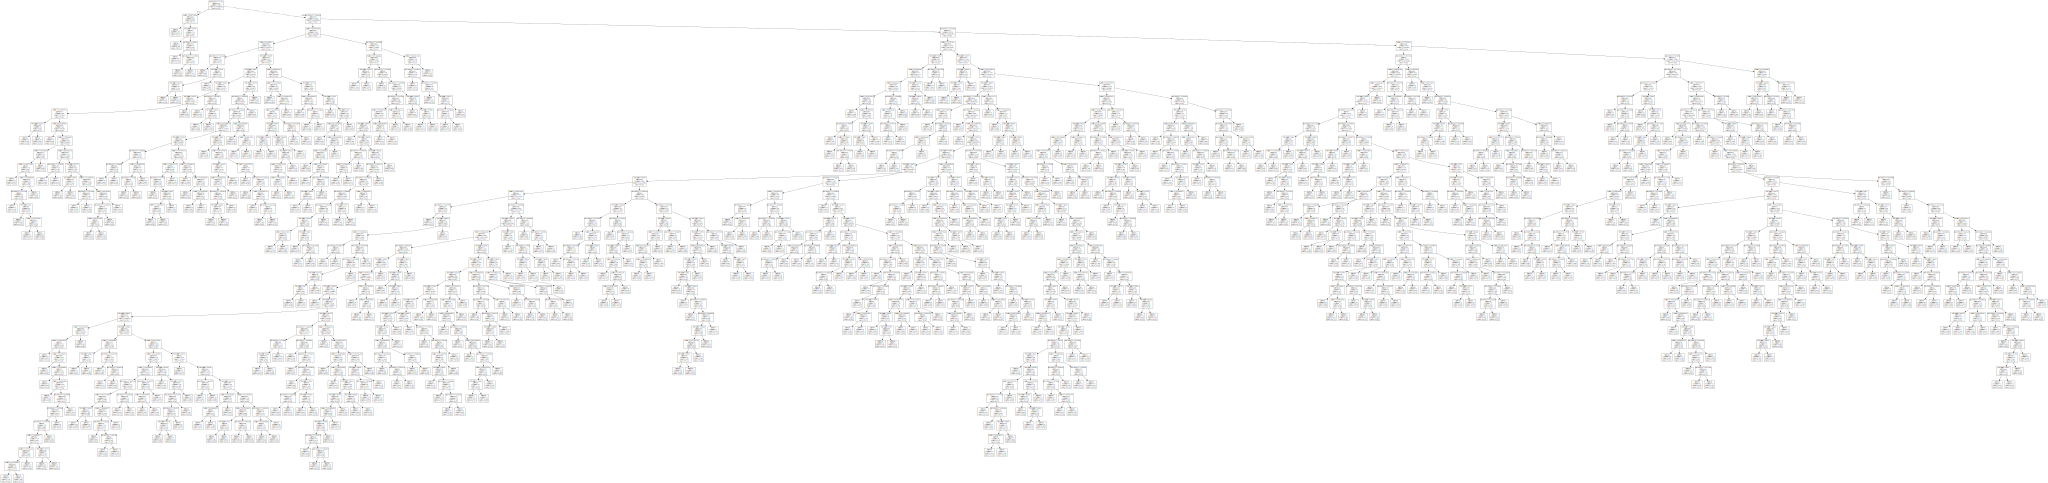

In [10]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

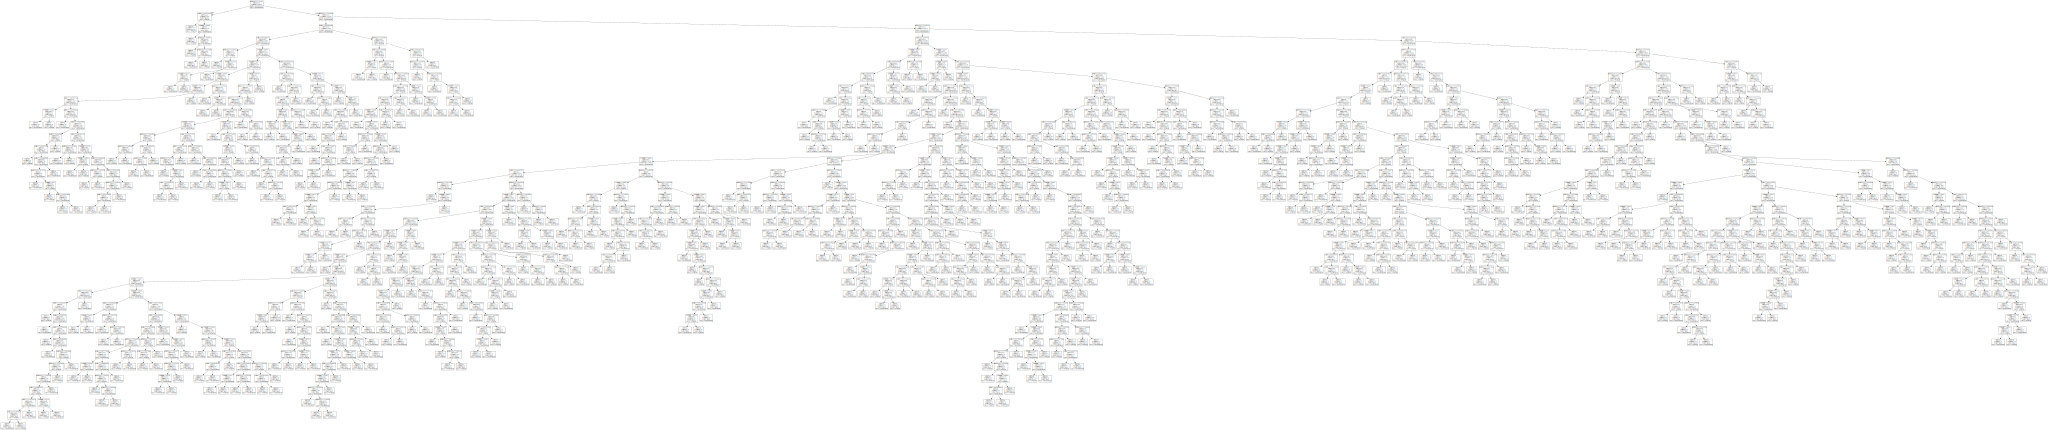

In [11]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=["Non-Potable",  "Potable"], feature_names= x_train.columns)) # display the tree, with no output file